# Data exploration (1)

This notebook explores the entire dataset, in order to:
- explore the meaning of attributes
- explore the distribution of attributes
- determine any immediate outliers
- help inform future data cleaning

## Imports

In [85]:
%matplotlib inline 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from extract import extract, SPOTIFY_DATASET, DOWNLOAD_PATH
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ayahusseini/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Downloading the data

In [30]:
data = extract(SPOTIFY_DATASET, DOWNLOAD_PATH, True)

100%|██████████| 8.17M/8.17M [00:00<00:00, 10.5MB/s]

Extracting files...


The dataset consists of different tracks, with a `track_id` unique identifier. Standard metadata like `artists` (with multiple artists seperated with a `;`) and `track_name`, `album_name` are also included. The popularity score is scaled from `0-100`. Other properties like `energy`, `key`, `loudness`, `instrumentalness` are also included.

In [31]:
data.head().to_clipboard()

There are $114,000$ rows in the dataset, with some null values. 

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [33]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Column descriptions

#### Popularity

The spotify [popularity index](https://www.artist.tools/features/spotify-popularity-index) is a score from $0-100$, with $100$ representing the most popular tracks. It ranks songs based on their **current** level of listener engagement: newer streams are weighted more heavily than older streams.

- **NB**: Since this dataset was last updated 2 years ago, predictions will be made based on historical data, rather than the most recent data. This should be updated later (more recent data extracted).


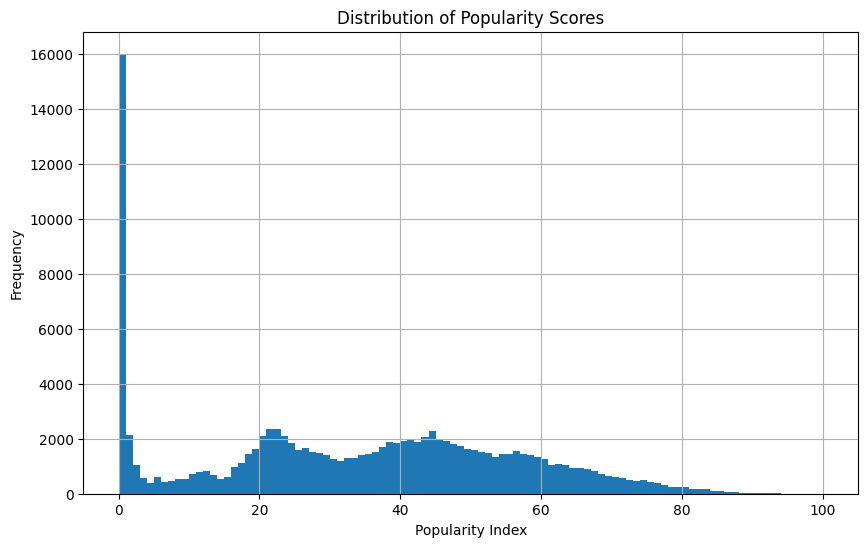

In [34]:
data["popularity"].hist(bins=100, figsize = (10,6))
plt.title("Distribution of Popularity Scores")
plt.xlabel("Popularity Index")
plt.ylabel("Frequency")
plt.show()

### Artists 

`artists` contains strings represesenting lists of artists who perform a track. If there's more than one, then they are seperated by a `;`.

These should be split into different artists

In [35]:
data["artists"].value_counts()

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64

Since we want to predict the success of a track based on *the sound alone*, the influence of artists on popularity will be ignored. 

## Duration 

The `duration_ms` column represents the song duration, in $\text{ms}$

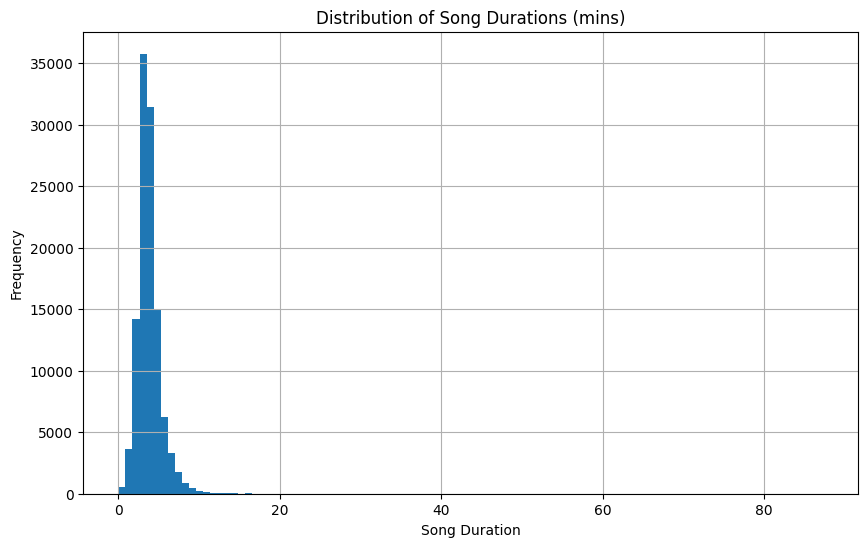

In [36]:
(data["duration_ms"] * 0.001 * 1/60).hist(bins=100, figsize = (10,6))
plt.title("Distribution of Song Durations (mins)")
plt.xlabel("Song Duration")
plt.ylabel("Frequency")
plt.show()

We can see that song duration has a median of around $4$ minutes, with a long tail end to the right. The maximum duration is around $87$ minutes. The distribution is narrow.

In [37]:
(data["duration_ms"] * 0.001 * 1/60).describe()

count    114000.000000
mean          3.800486
std           1.788295
min           0.000000
25%           2.901100
50%           3.548433
75%           4.358433
max          87.288250
Name: duration_ms, dtype: float64

### The artists 

In [38]:
artist_lists = data["artists"].str.split(';')

Of the $114,000$ tracks available, there is a total of $29860$ artists represented

In [39]:
all_artists = artist_lists.explode()
len(all_artists.unique())

29860

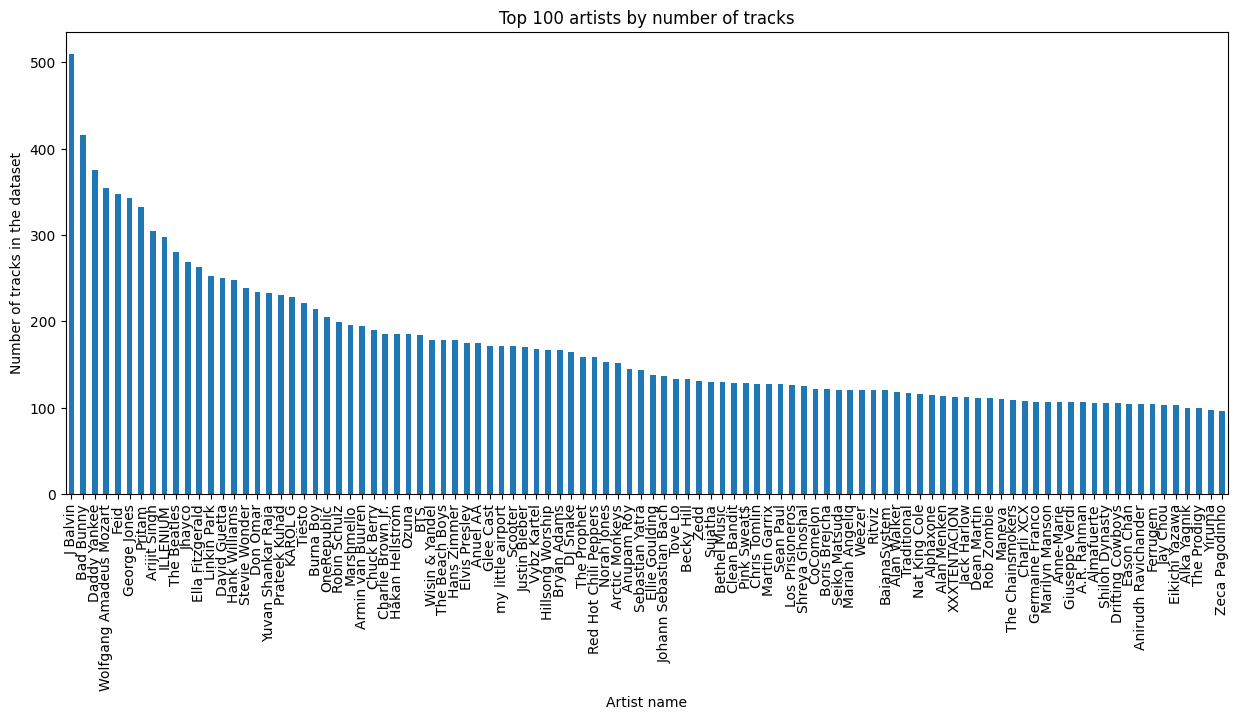

In [40]:
top_artists = all_artists.value_counts().sort_values(ascending=False).head(100)
top_artists.plot(kind='bar', figsize = (15,6))
plt.title("Top 100 artists by number of tracks")
plt.ylabel("Number of tracks in the dataset")
plt.xlabel("Artist name")
plt.show()

We can see that almost all of the top 100 artists (by number of tracks) have > 100 tracks in the dataset. This sharply drops off: 75% of artists have < 4 tracks, with an overall mean of 5 tracks.

In [41]:
all_artists.value_counts().describe()

count    29859.000000
mean         5.301316
std         13.746697
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        510.000000
Name: count, dtype: float64

#### More useful insights than the artist name 

More useful metrics for each artist than just their name is:
- Number of tracks
- Average artist track popularity

However, working these out from just the test dataset is unrepresentative: these would be good markers if we had data on *all* of the artist's tracks. 

Spotify has an artist popularity index, however this only reflects current popularity, and not the popularity in 2022 (when the dataset was collected). 

For this reason, it was decided that the `artists` column should be dropped. The same holds for the `album_name` and the `track_name`

### The tracks 
Each track has a unique `track_id`. We need to ensure that duplicates are dropped:

In [42]:
len(data)

114000

In [43]:
data["track_id"].nunique()

89741

It seems like there are duplicate track-ids with inconsistent information. 

In [44]:
duplicate_rows = data[data.duplicated(subset=['track_id'], keep=False)]

In [45]:
duplicate_rows

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,False,0.253,0.3590,11,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,False,0.490,0.2310,0,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,False,0.515,0.0736,8,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,False,0.624,0.1240,5,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


Of these duplicated rows, 450 are exact copies of one another.

In [46]:
len(data) - len(data.drop_duplicates())

450

In [47]:
inconsistent_rows = duplicate_rows.groupby('track_id').filter(
    lambda x: (x.drop(columns=['track_id']).nunique() > 1).any())

In [48]:
inconsistent_rows

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,False,0.253,0.3590,11,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,False,0.490,0.2310,0,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,False,0.515,0.0736,8,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,False,0.624,0.1240,5,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


For example, considering the first inconsistent row:

In [49]:
inconsistent_rows[inconsistent_rows['track_id'] == '5SuOikwiRyPMVoIQDJUgSV']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
62102,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,j-pop
99152,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,singer-songwriter
102151,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,songwriter


We note that tracks with multiple genres are given different rows. Since we won't be using `track_genre`, we can drop this as an attribute and then drop duplicates.

In [50]:
data = data.drop(labels = ['album_name','track_genre'], axis=1)
data = data.drop_duplicates()

In [51]:
print(f"Number of unique rows: {len(data.drop_duplicates())}")
print(f"Number of unique track ids: {data['track_id'].nunique()}")

Number of unique rows: 90461
Number of unique track ids: 89741


In [53]:
duplicate_rows = data[data.duplicated(subset=['track_id'], keep=False)]
duplicate_rows.head()

,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
29,2qESE1ZeWly7I3YjyTXmXh,Jason Mraz,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.78800,0.000000,0.1460,0.664,145.363,4
130,72R0X0h8YaxYNpegeoOl0M,Parachute,Kiss Me Slowly,61,235813,False,0.470,0.801,9,-6.426,1,0.0352,0.07580,0.000035,0.2180,0.431,173.920,4
1013,3BGxXQJWeLAEcwNKRFUxYA,BaianaSystem;BNegão,Reza Forte,38,232826,False,0.844,0.915,0,-4.060,0,0.1290,0.39300,0.002380,0.0847,0.872,145.997,4
1039,2zQt5C0AIv27RhfJCRZdZ4,BaianaSystem,"Jah Jah Revolta, Pt. 2",39,309493,False,0.776,0.800,8,-4.704,0,0.0438,0.00631,0.073100,0.3500,0.583,143.989,4
1096,3MZm4t1kRJ2e5JyaYQpjrF,Jackie Mittoo,Black Organ,34,191506,False,0.837,0.598,1,-9.047,0,0.1810,0.39100,0.238000,0.0598,0.983,145.219,4


What are the remaining duplicates?

In [54]:
data[data["track_id"] == "2qESE1ZeWly7I3YjyTXmXh"]

,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
29,2qESE1ZeWly7I3YjyTXmXh,Jason Mraz,Winter Wonderland,0,131760,False,0.62,0.309,5,-9.209,1,0.0495,0.788,0.0,0.146,0.664,145.363,4
91665,2qESE1ZeWly7I3YjyTXmXh,Jason Mraz,Winter Wonderland,1,131760,False,0.62,0.309,5,-9.209,1,0.0495,0.788,0.0,0.146,0.664,145.363,4


The remaining duplicates have inconsistent popularities. Since the inconsistent rows only make up less than $1\%$ of the data, we decide to clean them from the database.

In [56]:
print("Fraction of rows which are inconsistent")
data['track_id'].nunique() / len(data)

Fraction of rows which are inconsistent


0.9920407689501554

In [65]:
data = data.drop_duplicates(subset=['track_id'])

## Missing data

There's only one row with missing data, so we can drop this without much consequence:

In [66]:
data.isna().value_counts()

track_id  artists  track_name  popularity  duration_ms  explicit  danceability  energy  key    loudness  mode   speechiness  acousticness  instrumentalness  liveness  valence  tempo  time_signature
False     False    False       False       False        False     False         False   False  False     False  False        False         False             False     False    False  False             89740
          True     True        False       False        False     False         False   False  False     False  False        False         False             False     False    False  False                 1
Name: count, dtype: int64

In [70]:
data = data.dropna()

### Track name
More useful than the track name is a metric that measures the *sentiment* of the track name. This is calculated (crudely) with vader)

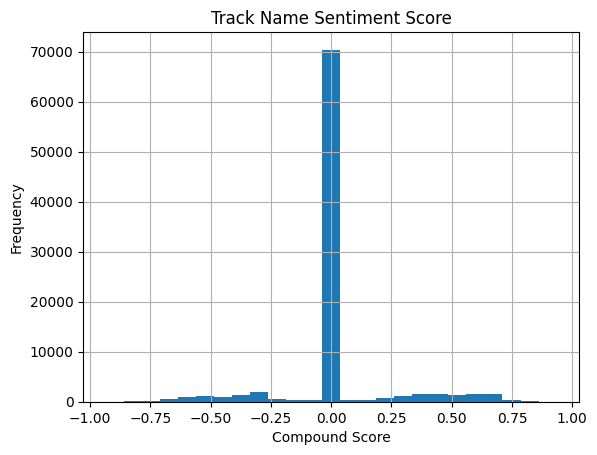

In [78]:
sia = SentimentIntensityAnalyzer()
data['track_name_sent'] = data["track_name"].apply(lambda x: sia.polarity_scores(x)['compound'])
data['track_name_sent'].hist(bins = 25)
plt.title("Track Name Sentiment Score")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

We can see that the vast majority of tracks have a neutral compound score, with a roughly even distribution of positive and negative sentiment scores. To determine if this is a useful metric, we can plot compound score against popularity:

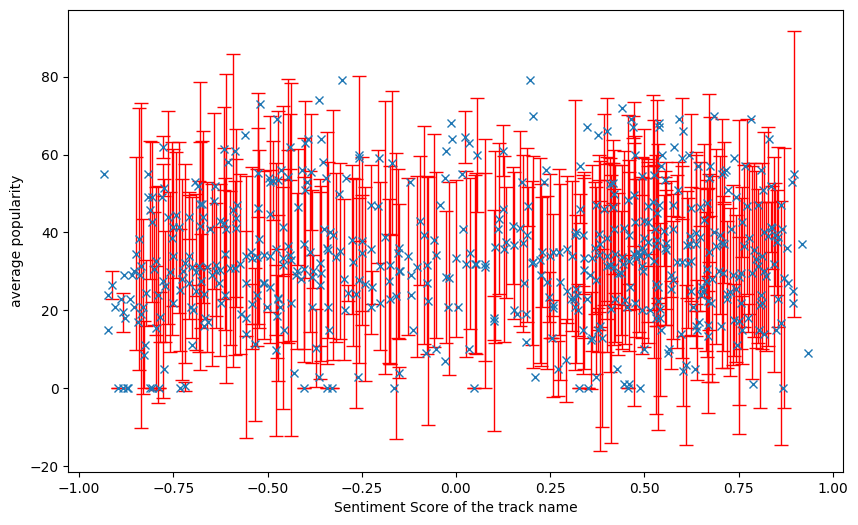

In [82]:
grouped_data = data.groupby('track_name_sent').agg(
    popularity_mean=('popularity', 'mean'),
    popularity_std=('popularity', 'std')
)
plt.figure(figsize=(10,6))
plt.errorbar(
    grouped_data.index,  
    grouped_data['popularity_mean'],  
    yerr=grouped_data['popularity_std'],  
    fmt='x',  
    ecolor='r',  
    capsize=5,   
    elinewidth=1, 
    markeredgewidth=1  
)

plt.xlabel("Sentiment Score of the track name")
plt.ylabel("average popularity")
plt.show()

  sentiment_category  popularity
0      Very Negative   28.406639
1           Negative   32.963159
2    Mildly Negative   31.544677
3            Neutral   33.339342
4    Mildly Positive   32.098068
5           Positive   33.874171
6      Very Positive   31.932203


/var/folders/mm/rqbfk7md25g8dfqhll70y8sc0000gn/T/ipykernel_42640/565564397.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('sentiment_category')['popularity'].mean().reset_index()


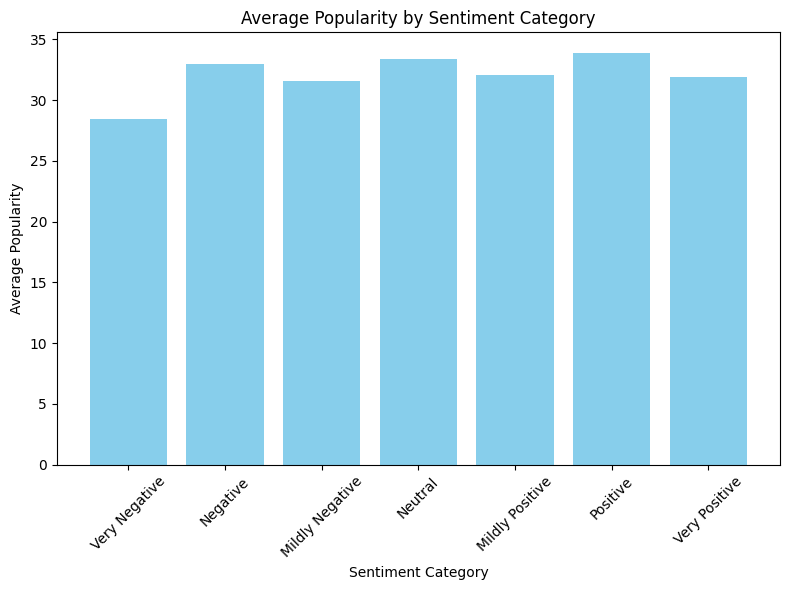

In [89]:

labels = ['Very Negative', 'Negative','Mildly Negative', 'Neutral','Mildly Positive', 'Positive', 'Very Positive']
bins = np.linspace(-1,1,num=len(labels)+1)

data['sentiment_category'] = pd.cut(data['track_name_sent'], bins=bins, labels=labels)
grouped_data = data.groupby('sentiment_category')['popularity'].mean().reset_index()

print(grouped_data)
plt.figure(figsize=(8,6))
plt.bar(grouped_data['sentiment_category'], grouped_data['popularity'], color='skyblue')

plt.title('Average Popularity by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We can see that there isn't *really* a correlation between popularity and the track title sentiment. Whilst the very positive and very negative track names are infrequent, this doesn't seem to have much effect on the popularity.

## Summary

- understood metrics and distributions
- Initial feature engineering:
    - Remove track genre, artist name, album name attributes
        - Future improvement: add in a 'lyrics sentiment' feature and explore how this affects results.
    - Replace track name with a more useful metric: track name sentiment score 
- Data cleaning decisions:
    - Remove rows with duplicated track ids